<a href="https://colab.research.google.com/github/Orpheric/Lartribu-Market-Study-Analysis/blob/main/Lartribu_market_study_Wordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
 
!pip install wordcloud

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip list

# Importing Librairies

In [ ]:
import numpy as np
import pandas as pd
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt


In [ ]:

df = pd.read_excel('/content/survey_modify.xlsx')

df.head()

,Unnamed: 0,age,gender,in_dakar,work_in_art,interessed_in_art,work_with_artist,tools_used_to_get_artist,experience_mark_with_artist,work_satisfaction,...,expectations2,artists_expectations_in_one_word,know_other_annuary,concurrents,experience_with_survey,dislike_about_survey,Submitted At,Token,expectations,expectations_in_one_word
0,0,16 - 25 ans,Féminin,True,True,NaN,NaN,NaN,NaN,NaN,...,"Que la totalité des données (échanges, product...",protection des données,False,NaN,9,Aucun apéro ? Pas de petits buffets ? C'est ré...,2022-01-07 19:24:26,5rmcjpqm0zjo1j3uqywxjaa5rmcjpof0,"Que la totalité des données (échanges, product...",protection des données
1,1,25 - 35 ans,Masculin,False,False,5.0,1.0,"Instagram, Bouche à oreille",9.0,A peu près,...,NaN,NaN,False,NaN,9,Peu d’infos sur la plateforme,2022-01-07 21:47:48,9n09lmwx7cmbopi7ialps9n09lmw8k1u,Qualité visuelle \nUtilité artistique \nVisib...,Qualité visuelle \nUtilité artistique \nVisib...
2,2,16 - 25 ans,Masculin,True,True,NaN,NaN,NaN,NaN,NaN,...,"Flexibilité, respect","Flexibilité, respect",False,NaN,9,"Je n’aime pas trop écrire, je préfère cocher",2022-01-07 21:47:39,p4tmnt85e5s5droqsxt59p4tmnth7h2a,"Flexibilité, respect","Flexibilité, respect"
3,3,16 - 25 ans,Masculin,True,False,5.0,0.0,Bouche à oreille,7.0,Oui,...,NaN,NaN,False,NaN,10,Franchement rien,2022-01-07 21:46:13,41lwhiddi4wo8xiw141lwh7661pcusc7,Efficace,Efficacite
4,4,16 - 25 ans,Féminin,True,False,2.0,1.0,Bouche à oreille,8.0,A peu près,...,NaN,NaN,False,NaN,9,Rien,2022-01-07 21:52:39,rsi72g5kwq1njsv7zk7mrsi72w6iivoi,Que la plateforme regroupe des artistes connus...,diversité d'artiste


# Nouvelle section

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 29 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   Unnamed: 0                        84 non-null     int64         
 1   age                               84 non-null     object        
 2   gender                            84 non-null     object        
 3   in_dakar                          84 non-null     bool          
 4   work_in_art                       84 non-null     bool          
 5   interessed_in_art                 44 non-null     float64       
 6   work_with_artist                  44 non-null     float64       
 7   tools_used_to_get_artist          29 non-null     object        
 8   experience_mark_with_artist       34 non-null     float64       
 9   work_satisfaction                 34 non-null     object        
 10  digital_annuary_is_it_good        44 non-null     ob

In [ ]:
df.columns

Index(['Unnamed: 0', 'age', 'gender', 'in_dakar', 'work_in_art',
       'interessed_in_art', 'work_with_artist', 'tools_used_to_get_artist',
       'experience_mark_with_artist', 'work_satisfaction',
       'digital_annuary_is_it_good', 'expectations1',
       'client_expectations_in_one_word', 'partTime_or_fullTime',
       'art_discipline', 'art_as_source_of_income',
       'artist_contact_with_client', 'save_work_in_annuary',
       'collaborate_with_artist', 'expectations2',
       'artists_expectations_in_one_word', 'know_other_annuary', 'concurrents',
       'experience_with_survey', 'dislike_about_survey', 'Submitted At',
       'Token', 'expectations', 'expectations_in_one_word'],
      dtype='object')

In [ ]:
df['expectations']=df['expectations1'].combine_first(df['expectations2'])
df.head()
df.to_excel("survey_modify.xlsx",sheet_name="Sheet1")

In [ ]:
dakar = df.groupby('in_dakar')
dakar.describe().head()

interessed_in_art                           ... experience_with_survey                 
                     count      mean       std  min  ...                    25%  50%   75%   max
in_dakar                                             ...                                        
False                 10.0  4.000000  0.666667  3.0  ...                    8.0  9.0  10.0  10.0
True                  31.0  3.709677  1.101319  1.0  ...                    7.0  9.0  10.0  10.0

[2 rows x 40 columns]

In [ ]:
expectations = df.groupby('expectations')
expectations.describe()

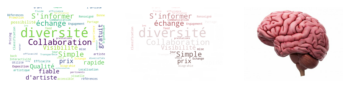

In [ ]:

client_expectations = " ".join(str(word) for word in df['client_expectations_in_one_word'].dropna() )
artist_expectations = " ".join(str(word) for word in df['artists_expectations_in_one_word'].dropna() )

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["de","et","la","le"])

thinker_mask = np.array(Image.open("/content/1646860.jpeg"))

wordcloud = WordCloud(max_font_size= 1000, background_color="white",stopwords=stopwords,mask=thinker_mask).generate(client_expectations)


# create coloring from image
image_colors = ImageColorGenerator(thinker_mask)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wordcloud, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(thinker_mask, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

wordcloud.to_file("client_expectations.png")


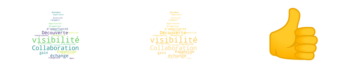

In [ ]:
# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["de","et","la","le","des"])


artist_mask = np.array(Image.open("/content/image.jpeg"))
wordcloud = WordCloud(max_font_size= 1000, background_color="white",stopwords=stopwords,mask=artist_mask).generate(artist_expectations)


# create coloring from image
image_colors = ImageColorGenerator(artist_mask)

# show
fig, axes = plt.subplots(1, 3)
axes[0].imshow(wordcloud, interpolation="bilinear")
# recolor wordcloud and show
# we could also give color_func=image_colors directly in the constructor
axes[1].imshow(wordcloud.recolor(color_func=image_colors), interpolation="bilinear")
axes[2].imshow(artist_mask, cmap=plt.cm.gray, interpolation="bilinear")
for ax in axes:
    ax.set_axis_off()
plt.show()

wordcloud.to_file("artist_expectations.png")

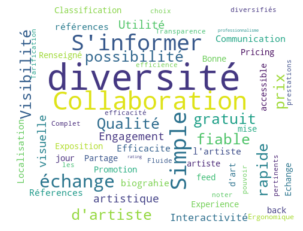

In [ ]:

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["de","et","la","le"])

thinker_mask = np.array(Image.open("/content/1646860.jpeg"))

wordcloud = WordCloud(max_font_size= 1000, background_color="white",stopwords=stopwords,mask=thinker_mask).generate(client_expectations)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("client_expectations.png")


In [ ]:

client_expectations = " ".join(str(word) for word in df['client_expectations_in_one_word'].dropna() )
artist_expectations = " ".join(str(word) for word in df['artists_expectations_in_one_word'].dropna() )

# Create stopword list:
stopwords = set(STOPWORDS)
stopwords.update(["de","et","la","le"])

thinker_mask = np.array(Image.open("/content/thinker.jpg"))

wordcloud = WordCloud(max_font_size= 1000, background_color="white",stopwords=stopwords,mask=thinker_mask).generate(client_expectations)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

wordcloud.to_file("client_expectations.png")


NameError: ignored

In [ ]:
from google.colab import drive

help(drive)

Help on module google.colab.drive in google.colab:

NAME
    google.colab.drive - Colab-specific Google Drive integration.

FUNCTIONS
    flush_and_unmount(timeout_ms=86400000)
        Unmount Google Drive and flush any outstanding writes to it.
    
    mount(mountpoint, force_remount=False, timeout_ms=120000, use_metadata_server=None)
        Mount your Google Drive at the specified mountpoint path.

DATA
    __all__ = ['flush_and_unmount', 'mount']

FILE
    /usr/local/lib/python3.7/dist-packages/google/colab/drive.py




In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
'/content/drive/MyDrive/Colab Notebooks'